In [1]:
import pandas as pd
import scanpy as sc
import squidpy as sq
import numpy as np
import matplotlib.pyplot as plt
import cellcharter as cc

/Users/guoz/miniconda3/envs/squidpy-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#data pre-processsing, from csv to adata 
data = pd.read_csv('data/classified_csv_celltype.csv')

In [32]:
obs = data[['class', 'sample_ID', 'short_ID', 'Tumor_ID', 'Treatment', 'slide', 
            'ROI_factor_per_tumor', 'tum_factor_per_treatment' ]].copy()
adata = sc.AnnData(obs=obs)
adata.obsm['spatial'] = data[['Location_Center_X', 'Location_Center_Y']].values
adata_tumor.obs['class'] = pd.Categorical(adata.obs['class'])
adata.write('anndata/mIHC_celltype.h5ad')
print(adata)

/Users/guoz/miniconda3/envs/squidpy-env/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 1695965 × 0
    obs: 'class', 'sample_ID', 'short_ID', 'Tumor_ID', 'Treatment', 'slide', 'ROI_factor_per_tumor', 'tum_factor_per_treatment'
    obsm: 'spatial'


In [4]:
unique_short_IDs = adata.obs['short_ID'].unique()
print(unique_short_IDs)

['Control_BT00011_ROI_1', 'Control_BT00011_ROI_2', 'Control_BT00011_ROI_3', 'Control_BT00011_ROI_4', 'Control_BT00011_ROI_5', ..., 'Olaparib_BT00023_ROI_3', 'Olaparib_BT00023_ROI_4', 'Olaparib_BT00023_ROI_5', 'Olaparib_BT00023_ROI_6', 'Olaparib_BT00023_ROI_7']
Length: 75
Categories (75, object): ['Control_BT00011_ROI_1', 'Control_BT00011_ROI_2', 'Control_BT00011_ROI_3', 'Control_BT00011_ROI_4', ..., 'Olaparib_BT00023_ROI_4', 'Olaparib_BT00023_ROI_5', 'Olaparib_BT00023_ROI_6', 'Olaparib_BT00023_ROI_7']


In [ ]:
adata = sc.read('anndata/mIHC_celltype.h5ad')

/Users/guoz/miniconda3/envs/squidpy-env/lib/python3.10/site-packages/squidpy/gr/_utils.py:194: ImplicitModificationWarning: Setting element `.obsp['spatial_connectivities']` of view, initializing view as actual.
  obj[key] = data
100%|████████████████████████████████████████| 1000/1000 [00:06<00:00, 165.31/s]
/Users/guoz/miniconda3/envs/squidpy-env/lib/python3.10/site-packages/squidpy/gr/_nhood.py:194: RuntimeWarning: divide by zero encountered in divide
  zscore = (count - perms.mean(axis=0)) / perms.std(axis=0)
/Users/guoz/miniconda3/envs/squidpy-env/lib/python3.10/site-packages/matplotlib/colors.py:1318: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/Users/guoz/miniconda3/envs/squidpy-env/lib/python3.10/site-packages/matplotlib/colors.py:1325: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)
/Users/guoz/miniconda3/envs/squidpy-env/lib/python3.10/site-packages/numpy/core/function_base.py:158: RuntimeW

<Figure size 800x700 with 0 Axes>

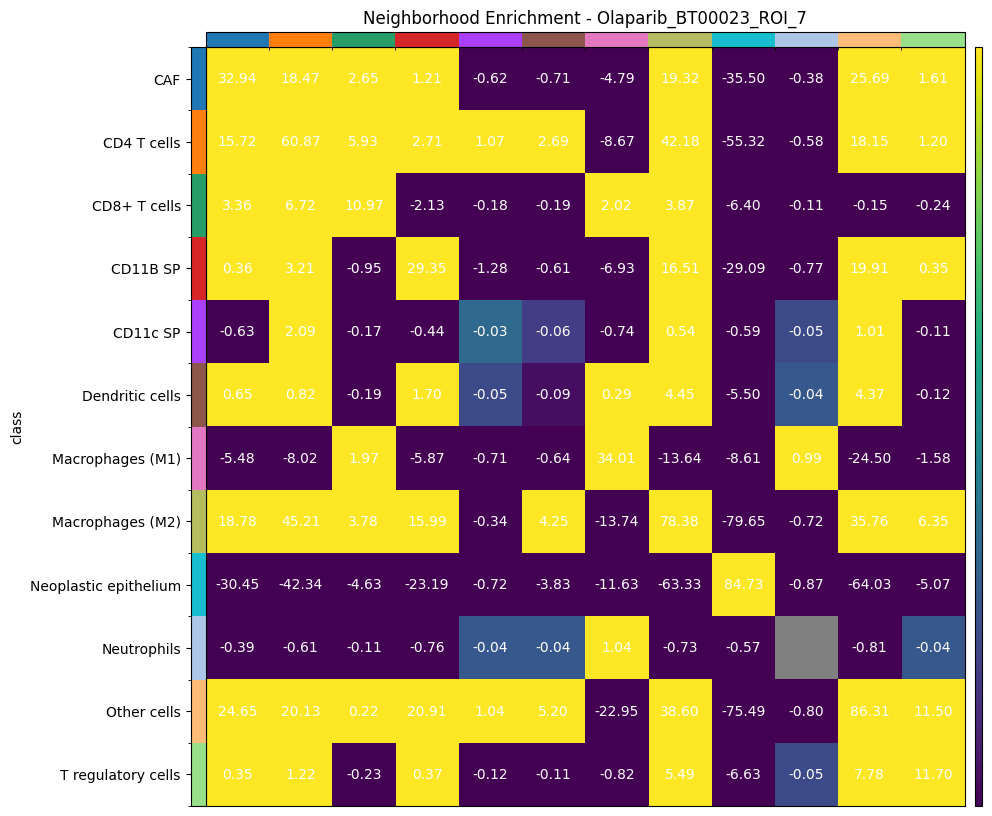

In [14]:

adata_subset = adata[adata.obs['short_ID'] == "Olaparib_BT00023_ROI_7"]

sq.gr.spatial_neighbors(adata_subset)
sq.gr.nhood_enrichment(adata_subset, cluster_key="class")


plt.figure(figsize=(8,7))
sq.pl.nhood_enrichment(adata_subset, cluster_key="class", annotate=True,title=f"Neighborhood Enrichment - Olaparib_BT00023_ROI_7")
plt.savefig(f"heatmaps_per_roi/neighborhood_enrichment_Olaparib_BT00023_ROI_7.png", 
                bbox_inches="tight")

In [6]:
custom_palette = {
    "Neoplastic epithelium": "#E3E5E5",
    "CAF": "#FFFF00",
    "CD11B SP": "#929000",
    "CD11c SP": "#7F2193",
    "Dendritic cells": "#00FF00",
    "Neutrophils": "#AA6731",
    "CD8+ T cells": "#FF40FF",
    "CD4 T cells": "#0433FF",
    "T regulatory cells": "#00F2FF",
    "Monocytes": "#F99291",
    "Macrophages (M1)": "#E12F00",
    "Macrophages (M2)": "#F09025",
    "Other cells": "#919191",
}

In [16]:
#example with proper color pallete 
sq.pl.nhood_enrichment(adata_subset, 
                       cluster_key="class", 
                       palette=custom_palette, 
                       annotate=True,
                       title=f"Neighborhood Enrichment - Control_BT00011_ROI_4")
# Adjust legend font size after the plot is created
fig = plt.gcf()  # Get the current figure
ax = fig.axes[0]  # Get the first axis
legend = ax.get_legend()  # Access the legend
if legend:
    legend.set_fontsize(18)  # Set the legend font size
#plt.show()  # Display the plot
plt.savefig(f"random_export/neighborhood_enrichment_Control_BT00011_ROI_4.png", bbox_inches="tight" )

IndentationError: unexpected indent (3126394535.py, line 7)

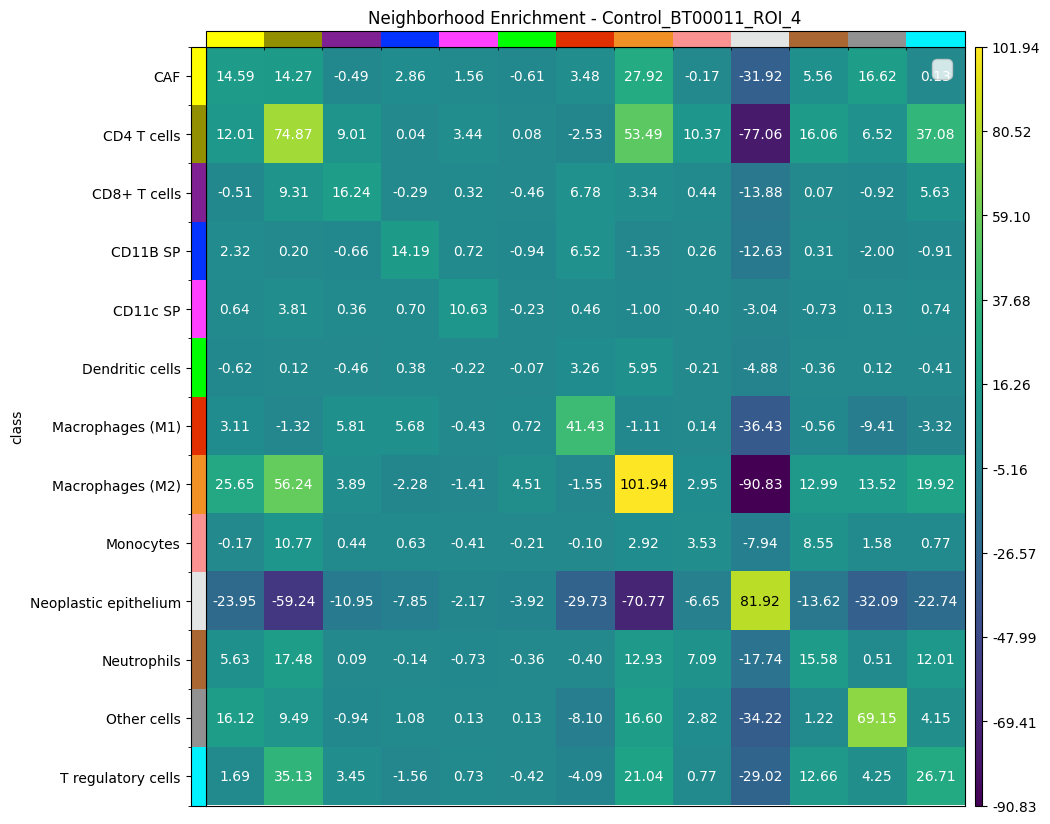

<Figure size 640x480 with 0 Axes>

In [18]:
sq.pl.nhood_enrichment(
    adata_subset, 
    cluster_key="class", 
    palette=custom_palette, 
    annotate=True,
    title=f"Neighborhood Enrichment - Control_BT00011_ROI_4"
)

# Adjust legend font size after the plot is created
fig = plt.gcf()  # Get the current figure
ax = fig.axes[0]  # Get the first axis
# Explicitly set the legend properties
handles, labels = ax.get_legend_handles_labels()  # Get legend entries
ax.legend(handles, labels, fontsize=18)  # Update font size for the legend
plt.show() 
# Save the plot
plt.savefig(
    f"random_export/neighborhood_enrichment_Control_BT00011_ROI_4b.png",
    bbox_inches="tight",
)

In [109]:
unique_short_IDs = adata.obs['short_ID'].unique()

for short_ID in unique_short_IDs:
    # Subset AnnData for the current short_ID
    adata_subset = adata[adata.obs['short_ID'] == short_ID]
    
    # Calculate spatial neighbors and neighborhood enrichment for the subset
    sq.gr.spatial_neighbors(adata_subset)
    sq.gr.nhood_enrichment(adata_subset, cluster_key="class")
    
    # Plot the neighborhood enrichment heat map
    plt.figure(figsize=(8,7))
    sq.pl.nhood_enrichment(adata_subset, cluster_key="class", annotate=True, 
                           title=f"Neighborhood Enrichment - Sample {short_ID}")
    
    # Save the plot to the folder
    plt.savefig(f"individual_heatmaps_new/neighborhood_enrichment_{short_ID}.png", 
                bbox_inches="tight")
    plt.close()  # Close the plot to free up memory

print(f"All heat maps saved in output folder.")

/Users/guoz/miniconda3/envs/squidpy-env/lib/python3.10/site-packages/squidpy/gr/_utils.py:194: ImplicitModificationWarning: Setting element `.obsp['spatial_connectivities']` of view, initializing view as actual.
  obj[key] = data






  0%|                                                    | 0/1000 [00:00<?, ?/s]





  0%|                                          | 1/1000 [00:06<1:44:17,  6.26s/]





  9%|███▉                                       | 92/1000 [00:06<00:44, 20.44/s]





 18%|███████▌                                  | 180/1000 [00:06<00:17, 46.97/s]





 27%|███████████▎                              | 270/1000 [00:06<00:08, 82.98/s]





 37%|███████████████▏                         | 369/1000 [00:06<00:04, 134.56/s]





 46%|██████████████████▊                      | 460/1000 [00:06<00:02, 192.79/s]





 55%|██████████████████████▋                  | 552/1000 [00:06<00:01, 263.11/s]





 65%|██████████████████████████▋              | 650/1000 [00:06<00:00, 350.1

All heat maps saved in output folder.


<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

In [ ]:
# next : comparative analysis between matrices